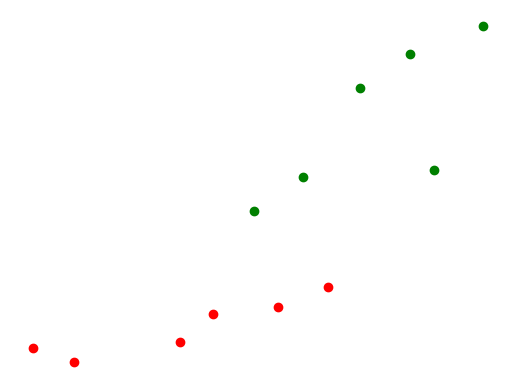

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
x1=[0.5, 0.75, 1.4, 1.6, 2, 2.3]
y1=[0.5, 0.4, 0.55, 0.75, 0.8, 0.95]
x2=[1.85, 2.15, 2.5, 2.8, 2.95, 3.25]
y2=[1.5, 1.75, 2.4, 2.65, 1.8, 2.85]
plt.plot(x1, y1, 'ro', label='line 1')
plt.plot(x2, y2, 'go', label='line 2')
#plt.title('Before LDA')
plt.axis('off')
plt.savefig("LDA_Plots_3.1.1.pdf", format="pdf", bbox_inches="tight")

In [2]:
'''
# Create the vectors X and Y
x = np.arange(0.5, 3.25, 0.01, dtype=np.double)
y = -0.4*x+1

# Create the plot
plt.plot(x,y, 'k', label='line 0')


y1_r=[0.6, 0.5, 0.48, 0.47, 0.46, 0.45]
y2_r=[0.2, 0.25, 0.22, 0.1, 0.18, 0]

my1=np.mean(y1_r)
my2=np.mean(y2_r)
print(my1)
print(my2)

x1=[]
for y in y1_r:
    x1.append((-y+1)/(0.4))
x2=[]
for y in y2_r:
    x2.append((-y+1)/(0.4))
plt.plot(x1, y1_r, 'ro', label='line 2')
plt.plot(x2, y2_r, 'go', label='line 1')
plt.plot((-my1+1)/(0.4), my1, 'r+', markersize=30)
plt.plot((-my2+1)/(0.4), my2, 'g+', markersize=30)
'''
pass

In [3]:

from lda import LDA_reducer as reducer
import matplotlib.pyplot as plt
import pandas as pd


x1=[0.5, 0.75, 1.4, 1.6, 2, 2.3]
y1=[0.5, 0.4, 0.55, 0.75, 0.8, 0.95]
x2=[1.85, 2.15, 2.5, 2.8, 2.95, 3.25]
y2=[1.5, 1.75, 2.4, 2.65, 1.8, 2.85]


x_12=np.concatenate((x1, x2), axis=0)
print(x_12)

y_12=np.concatenate((y1, y2), axis=0)
print(y_12)
i=0
T=[]
while(i<len(x_12)):
    if(i<len(x_12)/2):
        T.append(0)
    else:
        T.append(1)
    i=i+1
print(T)

data=pd.DataFrame({1:x_12,2:y_12, "target":T})
lda = reducer(data, 1, "target")
print(lda.eig_vec)
print(lda.eig_vec[0][0])
print(lda.eig_vec[0][1])


[0.5  0.75 1.4  1.6  2.   2.3  1.85 2.15 2.5  2.8  2.95 3.25]
[0.5  0.4  0.55 0.75 0.8  0.95 1.5  1.75 2.4  2.65 1.8  2.85]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[[-0.79147837  0.169613  ]
 [ 0.61119718 -0.98551075]]
-0.7914783660376133
0.16961300343433633


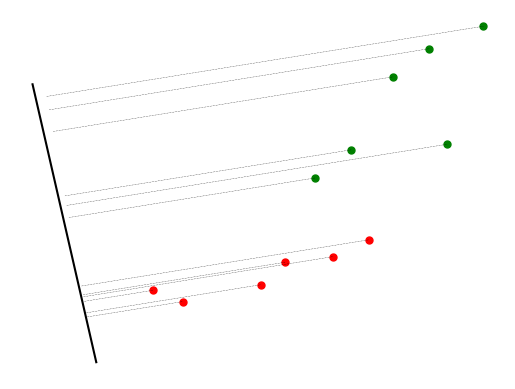

In [4]:
from numpy import append

slope=lda.eig_vec[0][0]/lda.eig_vec[0][1]

x = np.arange(-0.5, 0.03, 0.0001, dtype=np.double)
y = slope*x
plt.plot(x,y, 'k', label='line 0')
a = np.array([lda.eig_vec[0][0], lda.eig_vec[0][1]])


plt.plot(x1, y1, 'r.', markersize=10, label='line 3')
plt.plot(x2, y2, 'g.', markersize=10, label='line 4')

data = np.matrix('0.5,0.5;0.75,0.4;1.4,.55;1.6,0.75;2,0.8;2.3,0.95;1.85,1.5;2.15,1.75;2.5,2.4;2.8,2.65;2.95,1.8;3.25,2.85')
data = data.T
sample_mean = data.mean(1)
sample_cov = np.cov(data)
w = lda.eig_vec[:,1].T
transformed_coordinate = np.matmul(np.matrix(w), np.matrix(data))
coordinate_along_w = np.matmul(np.matrix(w).T, np.matrix(transformed_coordinate))
len_trans = max(transformed_coordinate.shape)

for i in range(0, len_trans):
    plt.plot([coordinate_along_w[0,i], data[0,i]], [coordinate_along_w[1,i], data[1,i]], "-.", color = "black", linewidth=0.2)
plt.axis('off')
plt.savefig("LDA_Plots_3.1.2.pdf", format="pdf", bbox_inches="tight")

The below was an attempt to generate random points (it failed but we can try again)

In [5]:
## Creating Random Points.....
#x1_n=np.random.normal(1.425, 0.8, size=(1, 6))
x1_n=np.random.multivariate_normal([1.425, 2.5833], [[0.8, 1], [0.5, 0.7]], size=(1, 6))
print(x1_n)
#x2_n=np.random.normal(2.5833, 0.8, size=(1, 6))
#print(x2_n)
#y1_n=np.random.normal(0.6583, 0.8, size=(1, 6))
#print(y1_n)
#y2_n=np.random.normal(2.1583, 0.8, size=(1, 6))
#print(y2_n)
#plt.plot(x1_n, y1_n, 'ro', label='line 2')
#plt.plot(x2_n, y2_n, 'go', label='line 1')
x1_n_t=np.transpose(x1_n)
print(x1_n_t)



[[[1.06089323 2.35135399]
  [1.28414976 2.49584358]
  [0.42894514 1.85602838]
  [1.56590247 2.86637619]
  [1.05645916 2.21278132]
  [2.18591043 2.91493412]]]
[[[1.06089323]
  [1.28414976]
  [0.42894514]
  [1.56590247]
  [1.05645916]
  [2.18591043]]

 [[2.35135399]
  [2.49584358]
  [1.85602838]
  [2.86637619]
  [2.21278132]
  [2.91493412]]]


/var/folders/xb/y453254j5qj_s_5vyyq_kgtm0000gn/T/ipykernel_2361/2287966834.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  x1_n=np.random.multivariate_normal([1.425, 2.5833], [[0.8, 1], [0.5, 0.7]], size=(1, 6))
